**Import Libraries**

In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load datasets and labels**

In [3]:
data = load_breast_cancer()
X, y = data.data, data.target
labels = data.target_names
feature_names = data.feature_names

**Print the description of the Breast Cancer data set**

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
print(data.target_names)

['malignant' 'benign']


**Standardize Data**

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Add Gaussian Noise**

In [9]:
np.random.seed(42)
noise_factor = 0.5
X_noisy = X_scaled + noise_factor*np.random.normal(loc=0.0, size=X.shape, scale=1.0)


**Load the original and noisy data sets into a DataFrame for comparison and visualization**

In [14]:
df = pd.DataFrame(X_scaled, columns=data.feature_names)
df_noise = pd.DataFrame(X_noisy, columns=data.feature_names)

In [15]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [16]:
df_noise.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.345421,-2.142467,1.593778,1.745890,1.451390,3.166446,3.442480,2.916193,1.982778,2.527027,...,2.619514,-1.472182,2.337365,1.288863,1.035495,2.672126,1.534030,2.483925,2.450303,1.791168
1,1.528967,0.572507,1.679206,1.379853,-0.415690,-1.097493,0.080586,-0.431691,-0.662701,-0.770222,...,1.967969,-0.561744,1.196665,2.196327,0.139888,0.035196,-0.566358,0.932478,-0.078258,0.768963
2,1.340301,0.363357,1.013336,0.960780,1.348473,1.731046,1.327473,2.538997,1.120503,-0.720568,...,1.402034,0.154582,2.086422,1.197149,0.123161,0.832054,1.312675,2.119376,0.887375,0.458025
3,-0.720371,0.738055,-0.943714,-0.928295,3.087499,2.671152,2.063957,1.582235,2.869940,4.793626,...,-1.240850,0.120727,-0.219824,0.681600,3.298094,4.044171,1.972232,1.591447,6.617453,5.310977
4,2.145813,-1.606510,2.477970,1.125304,0.573800,1.634568,0.875743,1.145344,0.040265,-0.814188,...,1.412305,-0.813199,0.534798,1.313041,0.350498,0.077517,-0.005297,0.069031,-0.607382,-0.248607


**Visualize data**

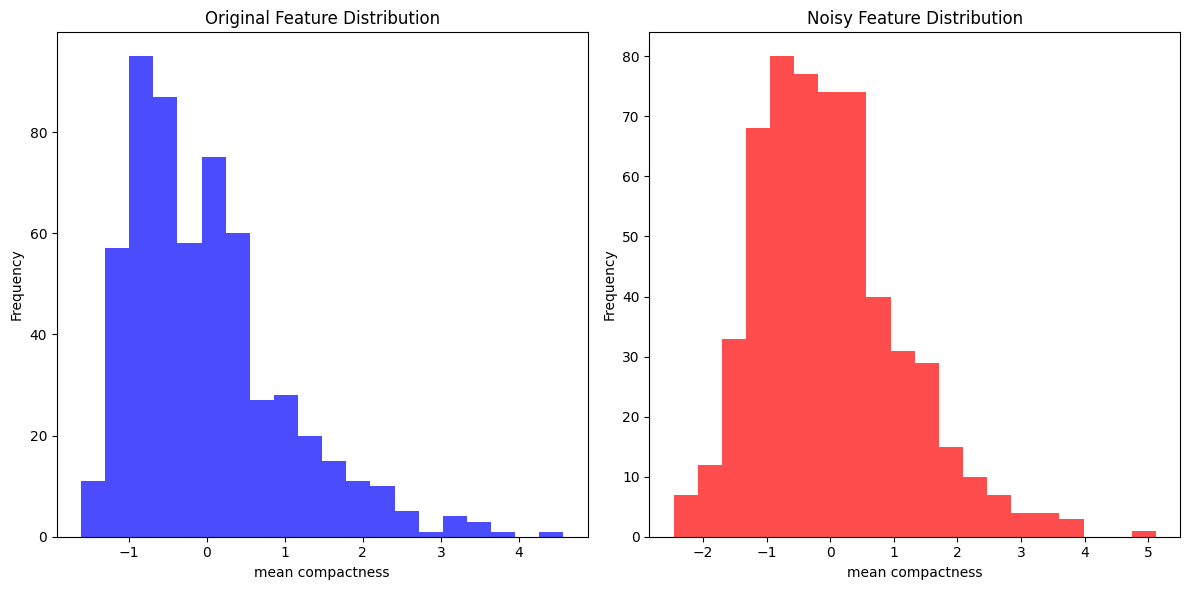

In [22]:
plt.figure(figsize=(12, 6))
# Original Data
plt.subplot(1, 2, 1)
plt.hist(df[feature_names[5]], bins=20, alpha=0.7, color='blue', label='Original Data')
plt.title('Original Feature Distribution')
plt.xlabel(feature_names[5])
plt.ylabel('Frequency')

# Noisy Data
plt.subplot(1, 2, 2)
plt.hist(df_noise[feature_names[5]], bins=20, alpha=0.7, color='red')
plt.title('Noisy Feature Distribution')
plt.xlabel(feature_names[5])  
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Lets try with line plot**

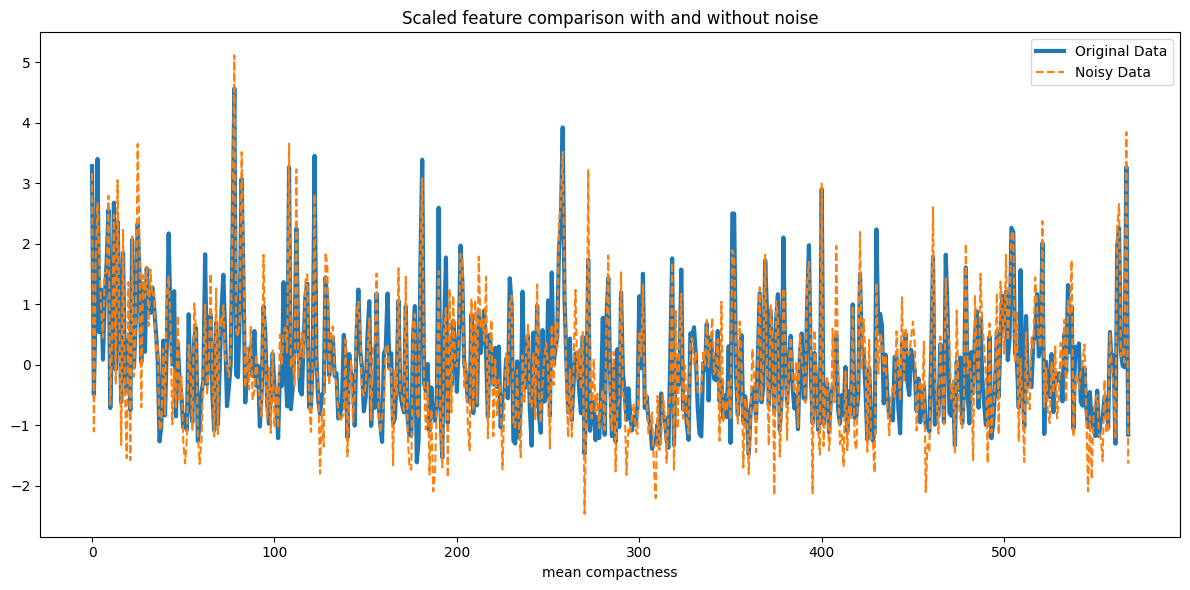

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df[feature_names[5]], label='Original Data', lw=3)
plt.plot(df_noise[feature_names[5]], ls='--', label='Noisy Data')
plt.title('Scaled feature comparison with and without noise')
plt.xlabel(feature_names[5])
plt.legend()
plt.tight_layout()
plt.show()

If nothing is given, then default x-axis will be the `index` and y-axis will be the value of `feature_names[5]`

**Lets visualize with scatter plot**

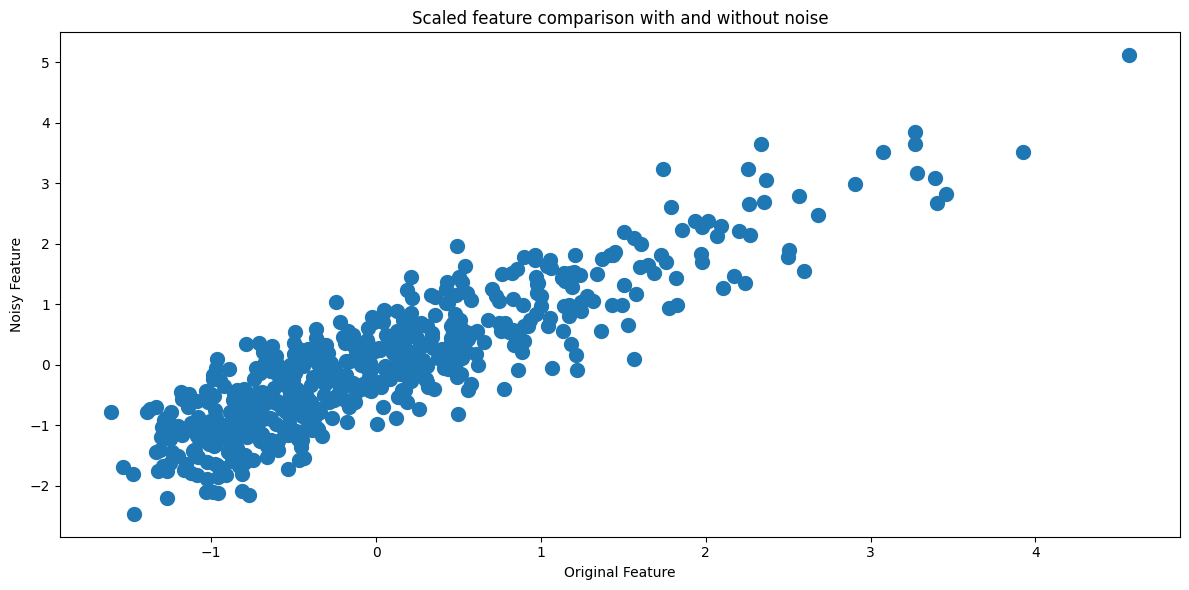

In [33]:
plt.figure(figsize=(12, 6))
plt.scatter(df[feature_names[5]], df_noise[feature_names[5]], lw=5)
plt.title('Scaled feature comparison with and without noise')
plt.xlabel('Original Feature')
plt.ylabel('Noisy Feature')
plt.tight_layout()
plt.show()

**Observation**</br>
Since we added noise on the original data. If we plotted original data wrt original data, it will be diagonal straight line, but we added noise, so the points are scatterd from original data

**Model Building**</br>
Let's use `KNeighbors` and `SVM` algorithm

In [43]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3)

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(C=1, random_state=42, kernel='linear')
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

**Making Prediction**

In [45]:
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

**Print the accuracy scores and classification reports for both models**

In [46]:
print(f'Accuracy Score for knn: {100*accuracy_score(y_test, y_pred_knn):.3f}%')
print(f'Accuracy Score for svm: {100*accuracy_score(y_test, y_pred_svm):.3f}%')

print(f'Classification Report for knn: \n{classification_report(y_test, y_pred_knn)}')
print(f'Classification Report for svm: \n{classification_report(y_test, y_pred_svm)}')

Accuracy Score for knn: 93.567%
Accuracy Score for svm: 97.076%
Classification Report for knn: 
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Classification Report for svm: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



**Lets plot and visualize `confusion_matrix`**

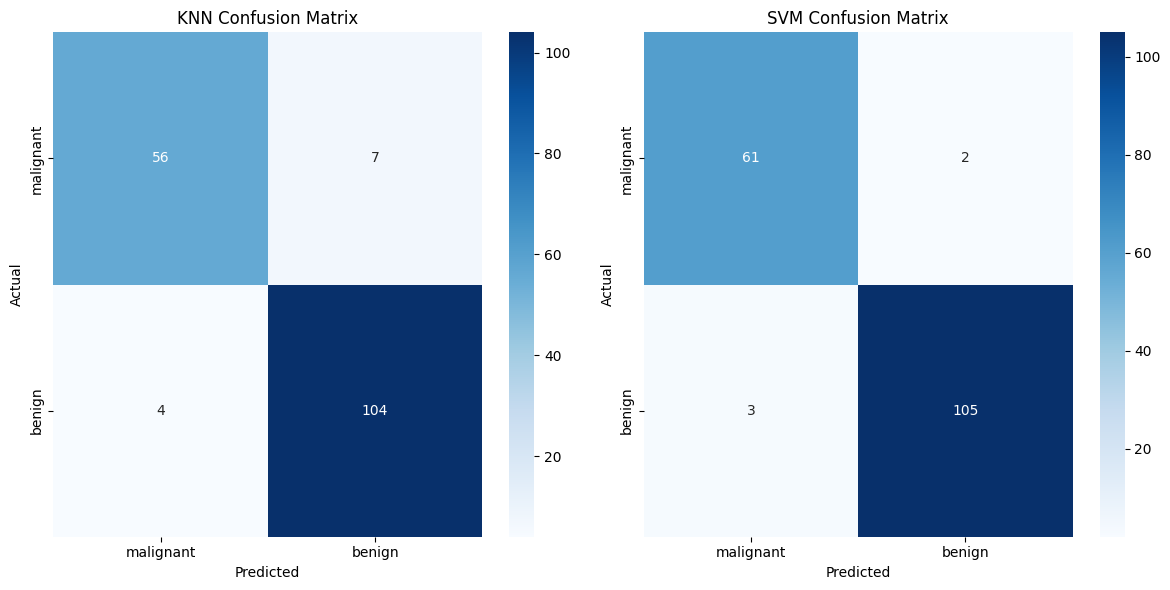

In [57]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# For KNN
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.heatmap(confusion_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=ax0, xticklabels=labels, yticklabels=labels)
ax0.set_title('KNN Confusion Matrix')
ax0.set_xlabel('Predicted')
ax0.set_ylabel('Actual')

# For SVM
sns.heatmap(confusion_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=ax1, xticklabels=labels, yticklabels=labels)
ax1.set_title('SVM Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

plt.tight_layout()
plt.show()

**Observations**

**What is the worst kind of prediction error in this context?**
* It would indeed be very unpleasant to be told you have cancer, when in fact you don't (`False Positive`). But the consequences of being told you don't have cancer when you actually do are life threatening (`False Negative`).
* By convention, a positive test for malignancy means a diagnosis of a mass being malignant. Thus, a benign prediction is a negative prediction. The worse-case scenario then is a false negative prediction, where the test incorrectly predicts that the mass is benign.
For the KNN model, the number of false negatives is 7, while for the SVM model the count is 2. We can say that the SVM model has a higher prediction sensitivity than the KNN model does.

**What can you say to compare the overall performances of the two models?**

SVM outperformed KNN in terms of precision, recall, and F1-score for both for the individual classes and their overall averages. This indicates that SVM is a stronger classifier. Although KNN performed quite well with an accuracy of 94%, SVM has better ability to correctly classify both malignant and beinign cases, with fewer errors. Given that the goal would be to choose the model with better generalization and fewer false negatives, SVM is certainly the preferred classifier.

**Let's check whether models are overfitting or not by evaluating model on training set**

In [51]:
y_pred_train_knn = knn.predict(X_train)
y_pred_train_svm = svm.predict(X_train)

In [52]:
print(f'Training Accuracy knn: {100*accuracy_score(y_train, y_pred_train_knn):.3f}%')
print(f'Training Accuracy svm: {100*accuracy_score(y_train, y_pred_train_svm):.3f}%')

print(f'Training Classification Report knn: \n{classification_report(y_train, y_pred_train_knn)}')
print(f'Training Classification Report svm: \n{classification_report(y_train, y_pred_train_svm)}')

Training Accuracy knn: 95.477%
Training Accuracy svm: 97.236%
Training Classification Report knn: 
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       149
           1       0.95      0.98      0.96       249

    accuracy                           0.95       398
   macro avg       0.96      0.95      0.95       398
weighted avg       0.96      0.95      0.95       398

Training Classification Report svm: 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       149
           1       0.97      0.99      0.98       249

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



**Confusion matrix for training data**

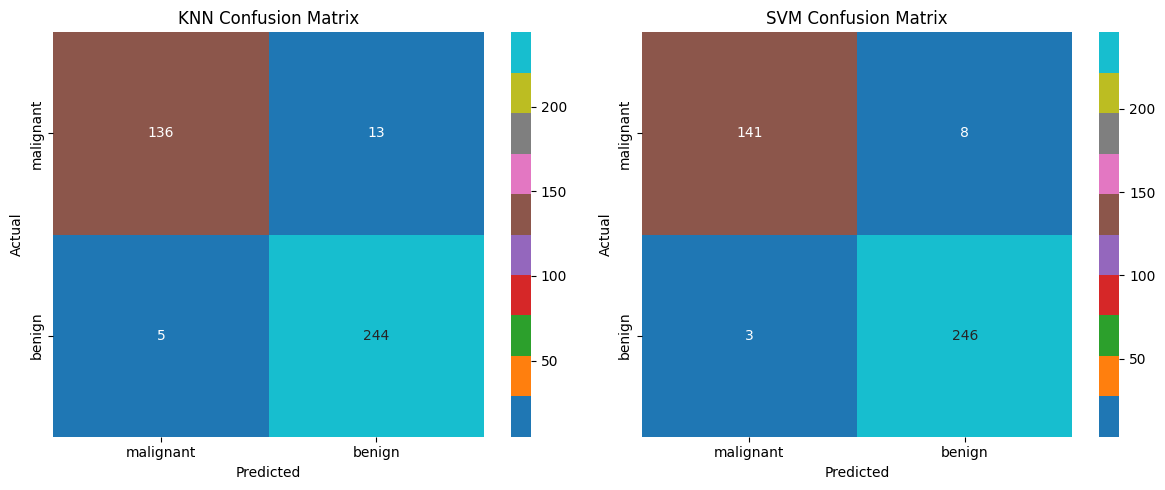

In [67]:
confusion_matrix_train_knn = confusion_matrix(y_train, y_pred_train_knn)
confusion_matrix_train_svm = confusion_matrix(y_train, y_pred_train_svm)

# Heatmap for KNN
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix_train_knn, annot=True, cmap='tab10', fmt='d', xticklabels=labels, yticklabels=labels, ax=ax[0])
ax[0].set_title('KNN Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Heatmap for svm
sns.heatmap(confusion_matrix_train_svm, annot=True, cmap='tab10', fmt='d', xticklabels=labels, yticklabels=labels, ax=ax[1])
ax[1].set_title('SVM Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

<details><summary>Click here for the solution</summary>


Ideally the accuracy of a model would be almost the same on the training and testing data sets.

It would be unusual for the accuracy to be higher on the test set and this might occur due to chance or some sort of data leakage. For example, here we have normalized all of the data rather than fitting StandardScaler to the training data and only then applying it to the train and test sets separately. We'll revisit this and other pitfalls in another lab. 

When the accuracy is substantially higher on the training data than on the testing data, the model is likely memorizing details in the training data that don't generalize to the unseen data - the model is overfitting to the training data.


| Model | Phase |  Accuracy |
| ------------  | -------- | --------- |
| KNN  | Train  | 95.5% |
| KNN  | Test   | 93.6% |
| SVM  | Train  | 97.2% |
| SVM  | Test   | 97.1% |

For the SVM model, the training and testing accuracies are essentially the same at about 97%. This is ideal - the SVM model is likely not overfit.
For the KNN model, however, the training accuracy is about 2% higher that the test accuracy, indicating there might be some overfitting.

In summary, the SVM model is both more convincing and has a higher accuracy than the KNN model. 
Remember, we aren't trying to tune these models; we are just comparing their performance with a fixed set of hyperparamters.


</details>